Wine quality machine learning project based of winequality-white.csv dataset

todo 
compare red and white wineset
compare results of knn to they correct quality
some visualtion
more sklearn things becouse i can 
try to use knn with only most important x features

**Reading data and importing all useful libraries**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

import graphviz
import itertools



url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
ulr_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"





In [312]:
df_white = pd.read_csv(url_white,sep=';')
df_red = pd.read_csv(ulr_red,sep =";" )

print(df_white.head(10))
df_red.head(10)

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6
5            8.1              0.28         0.40  ...       0.44     10.1        6
6            6.2              0.32         0.16  ...       0.47      9.6        6
7            7.0              0.27         0.36  ...       0.45      8.8        6
8            6.3              0.30         0.34  ...       0.49      9.5        6
9            8.1              0.22         0.43  ...       0.45     11.0        6

[10 rows x 12 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# ***Normalization of data except of Target "Quality column"***

In [0]:
def normalize_db(datas):
    normalized_X = preprocessing.normalize(datas[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

    targets = np.array(datas['quality'])

    normalized_X = np.insert(normalized_X,1, targets, axis= 1)
    df1_n = pd.DataFrame(normalized_X)
    df1_n.columns = ['fixed acidity','quality', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    cols = list(df1_n)
    cols[1],cols[11] = cols[11], cols[1]
    return df1_n.loc[:,cols]

df_white_normalized = normalize_db(df_white)
df_red_normalized = normalize_db(df_red)

# **# Example data after normalization and some description**

In [314]:

print(df_white_normalized.head(10))
df_red_normalized.head(10)

   fixed acidity   alcohol  volatile acidity  ...        pH  sulphates  quality
0       0.039447  0.049590          0.001522  ...  0.016906   0.002536      6.0
1       0.047267  0.071276          0.002251  ...  0.024759   0.003676      6.0
2       0.078912  0.098396          0.002728  ...  0.031760   0.004287      6.0
3       0.037412  0.051441          0.001195  ...  0.016575   0.002078      6.0
4       0.037412  0.051441          0.001195  ...  0.016575   0.002078      6.0
5       0.078912  0.098396          0.002728  ...  0.031760   0.004287      6.0
6       0.044300  0.068594          0.002286  ...  0.022722   0.003358      6.0
7       0.039447  0.049590          0.001522  ...  0.016906   0.002536      6.0
8       0.047267  0.071276          0.002251  ...  0.024759   0.003676      6.0
9       0.061012  0.082855          0.001657  ...  0.024254   0.003390      6.0

[10 rows x 12 columns]


,fixed acidity,alcohol,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,0.195153,0.247896,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,5.0
1,0.107241,0.134739,0.012099,0.000000,0.035747,0.001347,0.343722,0.921175,0.013705,0.043996,0.009349,5.0
2,0.135457,0.170189,0.013198,0.000695,0.039942,0.001598,0.260494,0.937777,0.017314,0.056614,0.011288,5.0
3,0.174367,0.152571,0.004359,0.008718,0.029580,0.001168,0.264664,0.934108,0.015537,0.049196,0.009030,6.0
4,0.195153,0.247896,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,5.0
5,0.168468,0.214000,0.015026,0.000000,0.040979,0.001707,0.295957,0.910637,0.022716,0.079908,0.012749,5.0
6,0.126961,0.151068,0.009643,0.000964,0.025714,0.001109,0.241066,0.948191,0.016013,0.053034,0.007393,5.0
7,0.252800,0.346301,0.022510,0.000000,0.041556,0.002251,0.519451,0.727232,0.034443,0.117396,0.016276,7.0
8,0.325838,0.396854,0.024229,0.000835,0.083548,0.003050,0.375967,0.751934,0.041640,0.140361,0.023811,7.0
9,0.071804,0.100526,0.004787,0.003447,0.058401,0.000680,0.162756,0.976537,0.009553,0.032073,0.007659,5.0


In [315]:
print(df_red.describe())
print(df_white.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]
       fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.0000

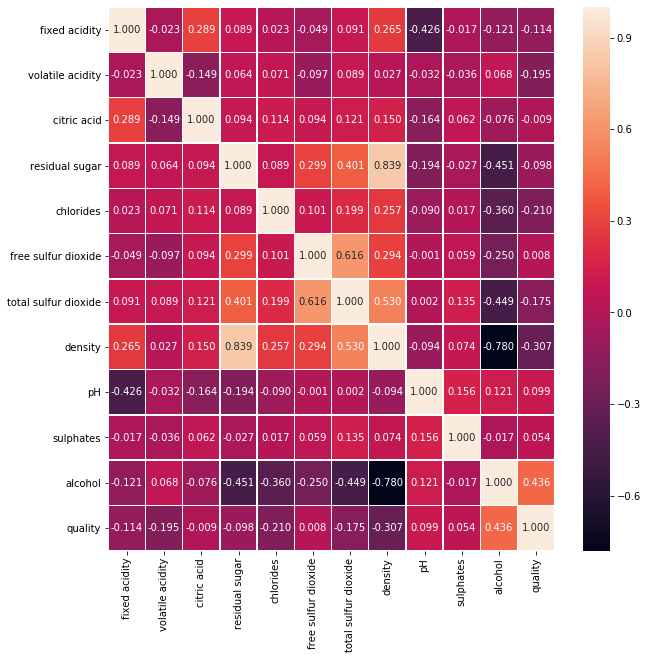

In [316]:
df_white.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_white.corr(), annot = True, linewidths=.5, fmt = ".3f", ax=ax)
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


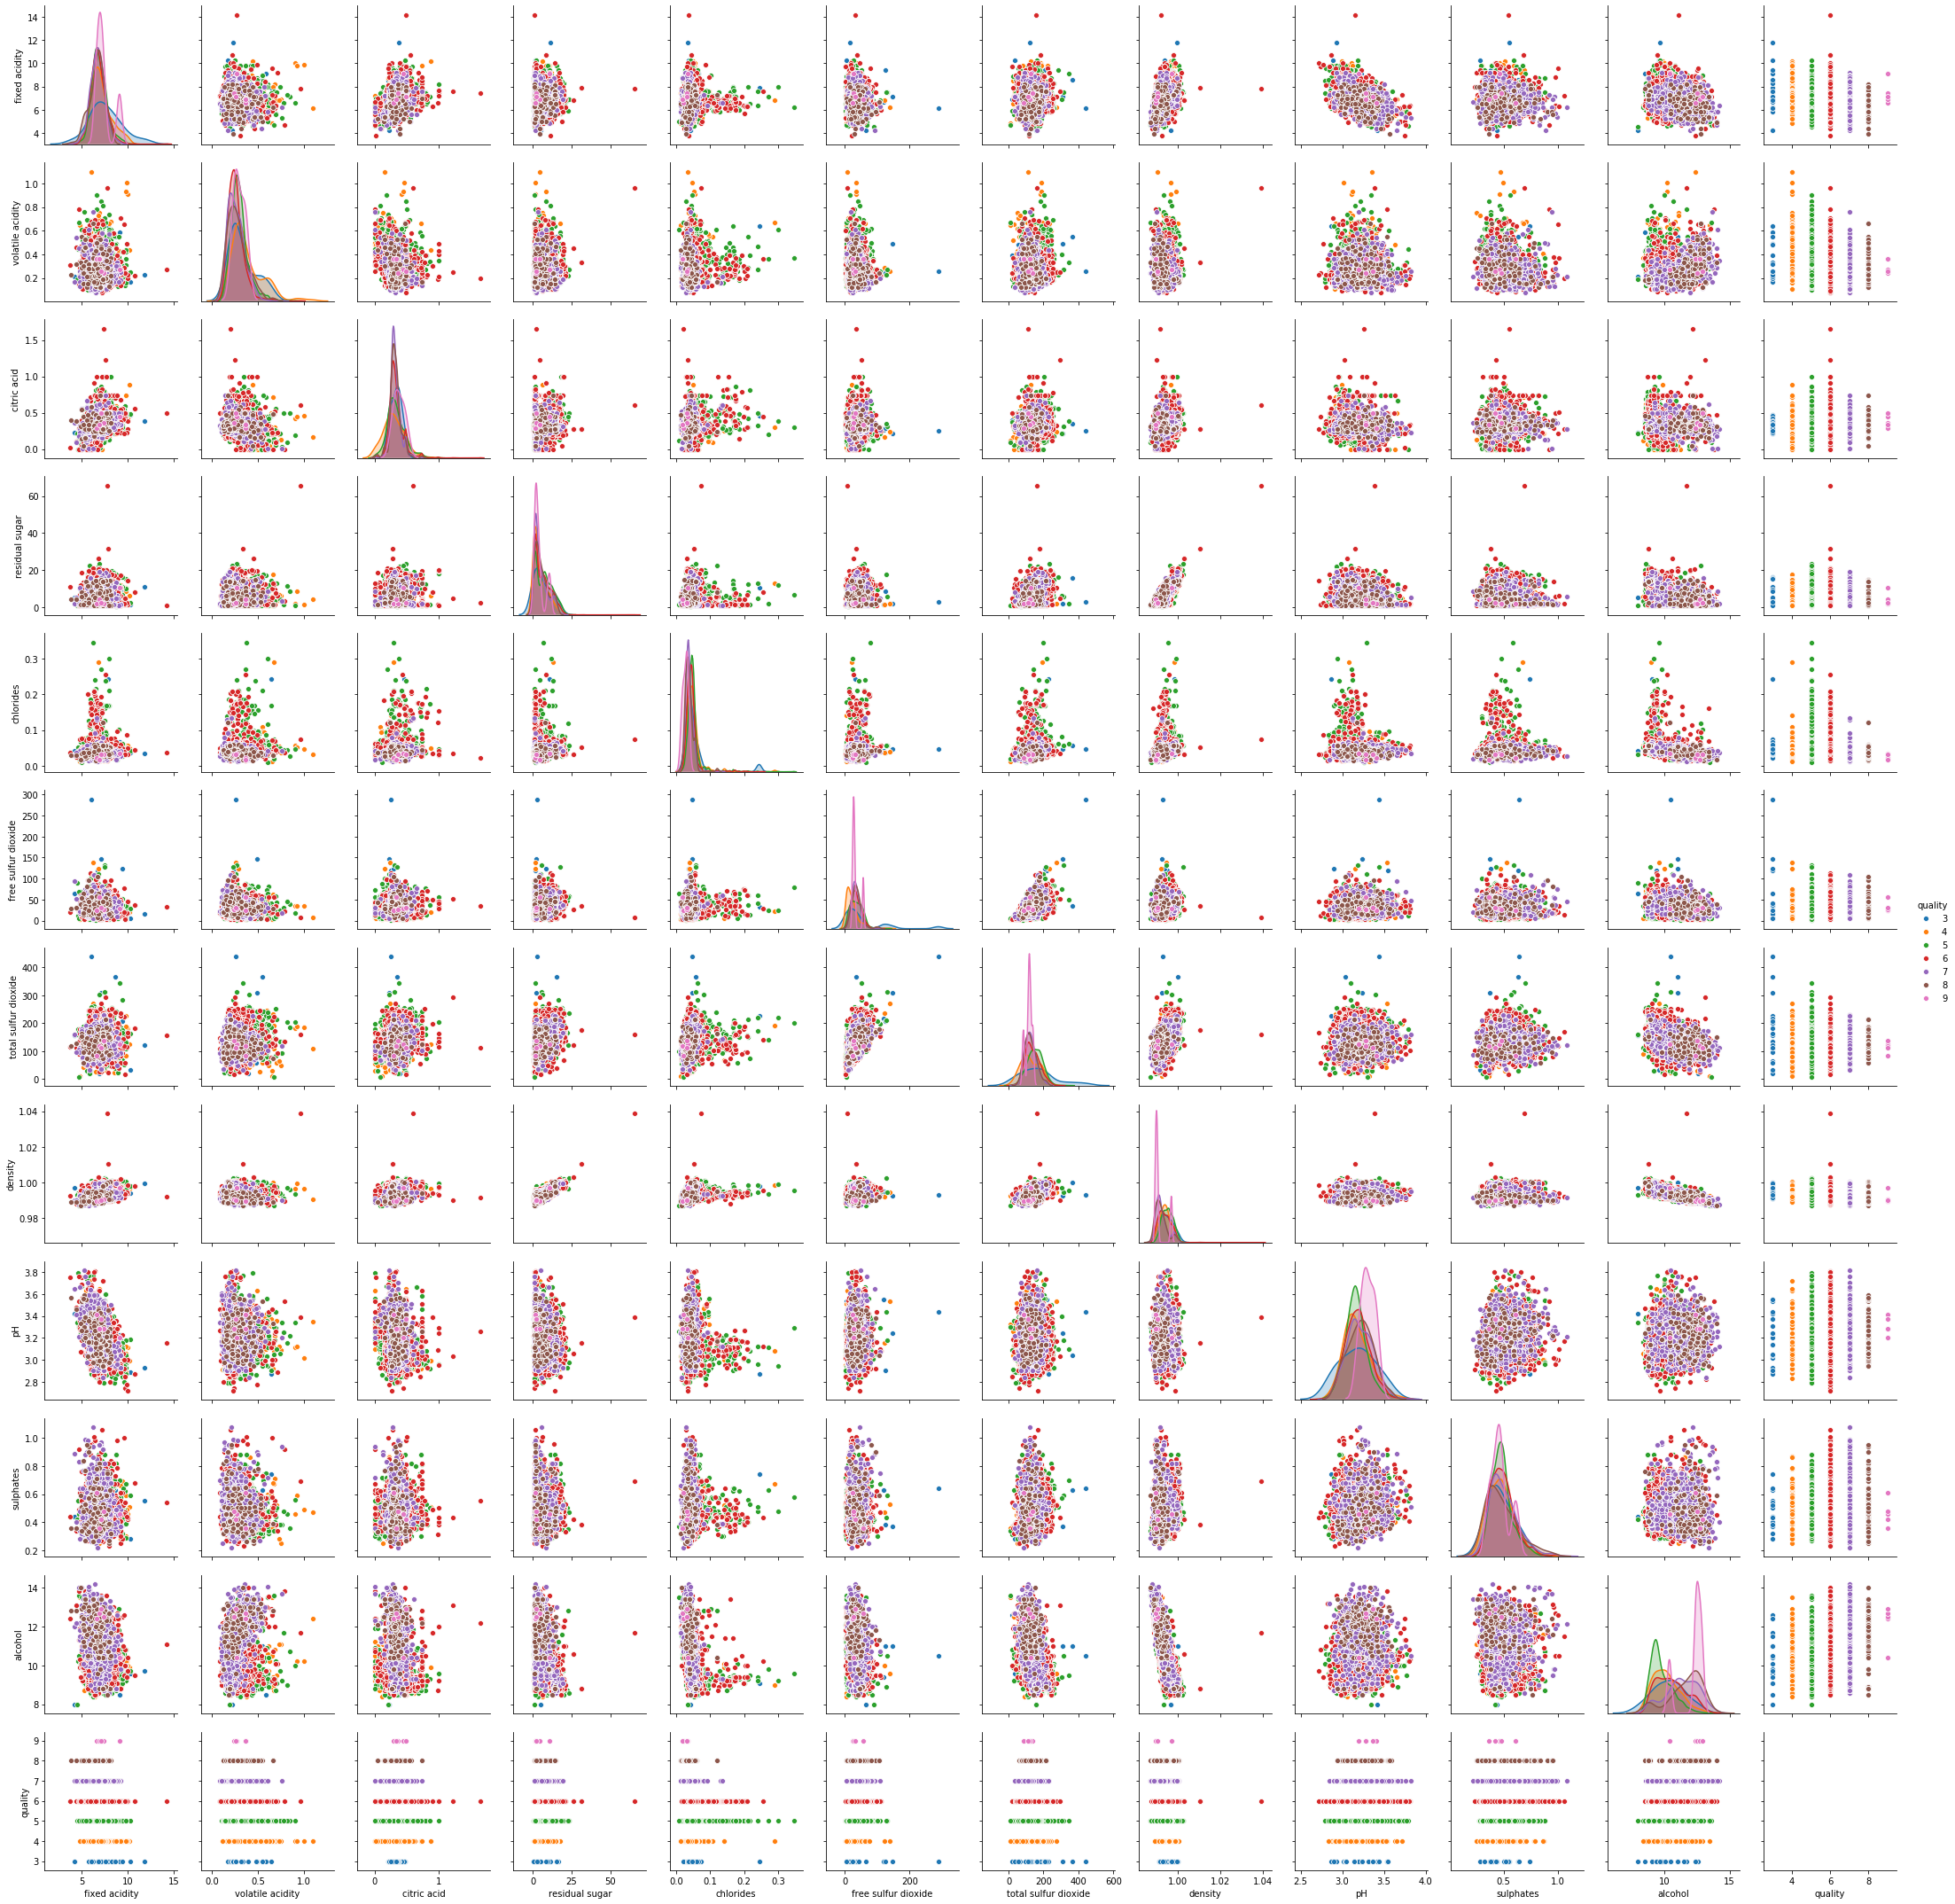

In [317]:
g = sns.pairplot(df_white, hue="quality")

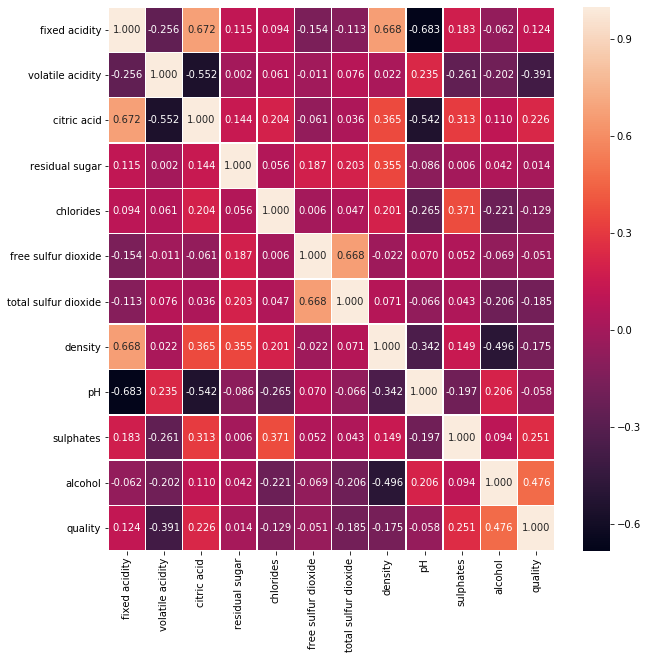

In [318]:
df_red.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_red.corr(), annot = True, linewidths=.5, fmt = ".3f", ax=ax)
plt.show()

In [0]:
fig, axes = plt.subplots(11,11, figsize=(50,50))
for i in range(11):
    for j in range(11):
        axes[i, j].scatter(df_red.iloc[:,i], df_red.iloc[:,j], c = df_red.quality)
        axes[i,j].set_xlabel(df_red.columns[i])
        axes[i,j].set_ylabel(df_red.columns[j])
        axes[i,j].legend(df_red.quality)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

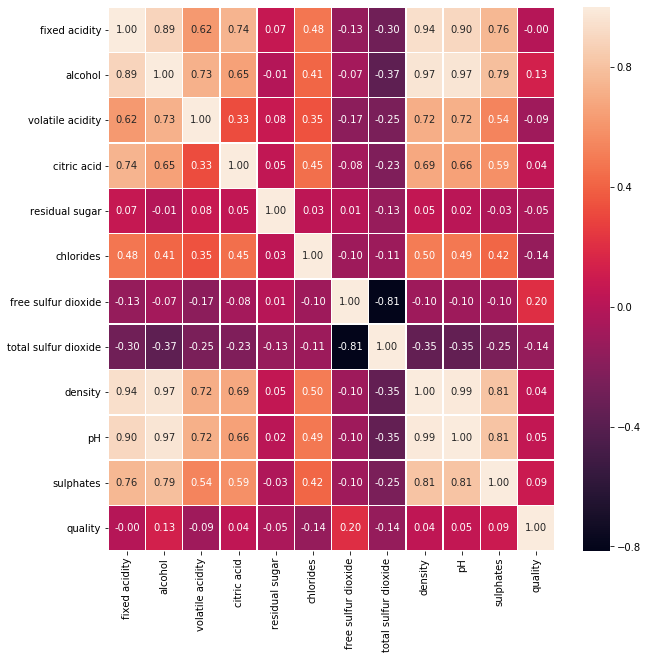

In [0]:
df_white_normalized.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_white_normalized.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

In [0]:
train_data_white, test_data_white = np.split(df_white,[len(df_white)*8//10])
true_qualites_white = test_data_white['quality']
test_data_white = test_data_white.drop(labels='quality', axis=1)


In [0]:
train_data_red, test_data_red = np.split(df_red,[len(df_red)*7//10])
true_qualites_red = test_data_red['quality']
test_data_red = test_data_red.drop(labels='quality', axis=1)


In [0]:
 train_data_normalized, test_data_normalized = np.split(df_red_normalized,[len(df_red_normalized)*7//10])
 test_data_normalized = test_data_normalized.drop(labels='quality', axis=1)

***First classification method KNN (k-Nearest Neighbors)***

In [0]:
def KNN(train_X, train_Y, test_X, ks):
  
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)
   
    preds = {}
    
    first = 2*np.matmul(train_X,test_X.transpose())
    second = (train_X**2).sum(axis=1).reshape(-1,1)
    third = (test_X**2).sum(axis=1).reshape(1,-1)
    distance = -first + second + third
          
    closest = distance.argsort(axis=0)  
    targets = train_Y[closest]

           
    for k in ks:
        predictions = sstats.mode(targets[:k],axis=0)[0]


        predictions = predictions.ravel()
        preds[k] = predictions

    return preds

In [0]:

train_x_white = np.array(train_data_white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y_white = np.array(train_data_white['quality'])

unknown_x_white = np.array(test_data_white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

preds_knn_white = KNN(train_x_white, train_y_white, unknown_x_white, np.arange(1,73,2).tolist())

***White Wine***

In [345]:
list_of_error = []
for number_of_neigh in preds_knn_white:
    diffs = 0
    for pred_quality, quality in zip(preds_knn_white[number_of_neigh], true_qualites_white):
        #print(pred_quality, quality)
        if pred_quality != quality :
            diffs += 1
    list_of_error.append((number_of_neigh,diffs/len(true_qualites_white)))

for i in list_of_error:
    print(i) 

(1, 0.5948979591836735)
(3, 0.6153061224489796)
(5, 0.5908163265306122)
(7, 0.5489795918367347)
(9, 0.5459183673469388)
(11, 0.560204081632653)
(13, 0.5438775510204081)
(15, 0.5336734693877551)
(17, 0.5163265306122449)
(19, 0.5326530612244897)
(21, 0.5306122448979592)
(23, 0.5183673469387755)
(25, 0.5051020408163265)
(27, 0.5091836734693878)
(29, 0.5061224489795918)
(31, 0.5112244897959184)
(33, 0.5142857142857142)
(35, 0.5183673469387755)
(37, 0.5193877551020408)
(39, 0.5275510204081633)
(41, 0.5377551020408163)
(43, 0.5265306122448979)
(45, 0.513265306122449)
(47, 0.5010204081632653)
(49, 0.49387755102040815)
(51, 0.4897959183673469)
(53, 0.4897959183673469)
(55, 0.49489795918367346)
(57, 0.4989795918367347)
(59, 0.49795918367346936)
(61, 0.5040816326530613)
(63, 0.503061224489796)
(65, 0.5)
(67, 0.49489795918367346)
(69, 0.49183673469387756)
(71, 0.4897959183673469)


Text(0.5, 0, 'number of neigh')

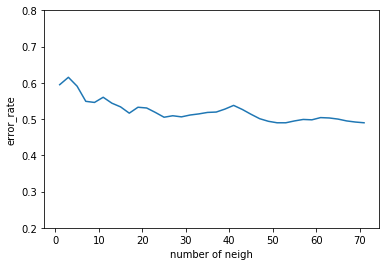

In [346]:

ax = sns.lineplot([x[0] for x in list_of_error] , [x[1] for x in list_of_error])
ax.set_ylim([0.20,0.8])
ax.set_ylabel("error_rate")
ax.set_xlabel("number of neigh")



In [0]:
train_x_red = np.array(train_data_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y_red = np.array(train_data_red['quality'])

unknown_x_red = np.array(test_data_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])


preds_knn_red = KNN(train_x_red, train_y_red, unknown_x_red, np.arange(1,51,2).tolist())

***Red Wine***

In [348]:
list_of_error = []
for number_of_neigh in preds_knn_red:
    diffs = 0
    for pred_quality, quality in zip(preds_knn_red[number_of_neigh], true_qualites_red):
        if pred_quality != quality :
            diffs += 1
    list_of_error.append((number_of_neigh,diffs/len(true_qualites_red)))
for i in list_of_error:
    print(i)       


(1, 0.5916666666666667)
(3, 0.5708333333333333)
(5, 0.5666666666666667)
(7, 0.55)
(9, 0.55)
(11, 0.56875)
(13, 0.5458333333333333)
(15, 0.5479166666666667)
(17, 0.525)
(19, 0.51875)
(21, 0.5166666666666667)
(23, 0.5208333333333334)
(25, 0.53125)
(27, 0.5229166666666667)
(29, 0.5104166666666666)
(31, 0.5083333333333333)
(33, 0.5145833333333333)
(35, 0.5083333333333333)
(37, 0.5125)
(39, 0.5083333333333333)
(41, 0.5208333333333334)
(43, 0.5041666666666667)
(45, 0.5)
(47, 0.51875)
(49, 0.50625)


/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


Text(0.5, 0, 'number of neigh')

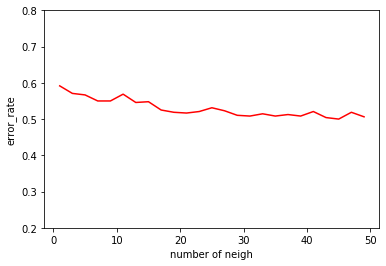

In [351]:
ax = sns.lineplot([x[0] for x in list_of_error] , [x[1] for x in list_of_error], c="red")
ax.set_ylim([0.20,0.8])
ax.set_ylabel("error_rate")
ax.set_xlabel("number of neigh")


# ***Distribution of Qualities in each dataset***

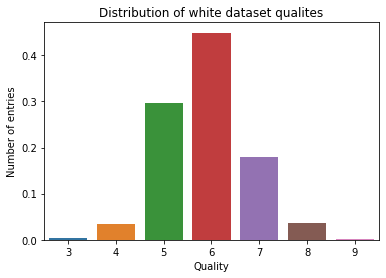

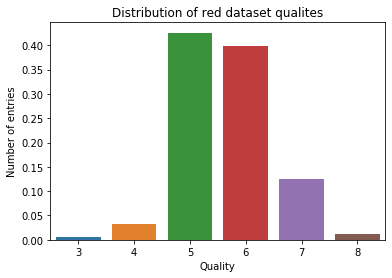

4898 1599


In [352]:
count_white = df_white['quality'].value_counts().to_dict()
count_red = df_red['quality'].value_counts().to_dict()

sns.barplot(list(count_white.keys()), list(map (lambda x: x /len(df_white) ,list(count_white.values()))))
plt.xlabel("Quality")
plt.ylabel("Number of entries")
plt.title("Distribution of white dataset qualites") 
plt.show()


sns.barplot(list(count_red.keys()), list(map (lambda x: x /len(df_red) ,list(count_red.values()))))
plt.xlabel("Quality")
plt.ylabel("Number of entries")
plt.title("Distribution of red dataset qualites") 
plt.show()
print(len(df_white), len(df_red))

# ***Trying to find best features for our predicitons ***

In [0]:
def choose_features_with_lowest_missrate(df, color):   
    def miss_rate(preds_knn):
        list_of_variance = []
        if color == 0:
            qualites = true_qualites_white
        else:
            qualites = true_qualites_red
        for number_of_neigh in preds_knn:
            diffs = 0
            for pred_quality, quality in zip(preds_knn[number_of_neigh], qualites):
                if pred_quality != quality :
                    diffs += 1
            list_of_variance.append(diffs/len(qualites))
        return min(list_of_variance)

    if color == 0:
        train_data =  train_data_white
        test_data  =  test_data_white    
    else:
        train_data = train_data_red
        test_data = test_data_red
    feature_miss_rate = []

    for L in range(1, 6):
        for subset in itertools.combinations(df.columns[:-1], L):
            subset = list(subset)
            train_x = np.array(train_data[subset])
            train_y = np.array(train_data['quality'])
            unknown_x= np.array(test_data[subset])
            preds_knn = KNN(train_x, train_y, unknown_x, np.arange(1,21,2).tolist())
            feature_miss_rate.append((subset,miss_rate(preds_knn)))

    return feature_miss_rate

whites = choose_features_with_lowest_missrate(df_white, 0)
reds = choose_features_with_lowest_missrate(df_red, 1)

In [376]:
whites.sort(key=lambda tup: tup[1])
for i in whites[:15]:
    print(i)


(['volatile acidity', 'citric acid', 'chlorides', 'alcohol'], 0.45918367346938777)
(['volatile acidity', 'pH', 'alcohol'], 0.4602040816326531)
(['volatile acidity', 'citric acid', 'chlorides', 'density', 'alcohol'], 0.4602040816326531)
(['volatile acidity', 'chlorides', 'alcohol'], 0.46122448979591835)
(['volatile acidity', 'chlorides', 'density', 'alcohol'], 0.46122448979591835)
(['volatile acidity', 'density', 'pH', 'alcohol'], 0.46224489795918366)
(['volatile acidity', 'citric acid', 'density', 'alcohol'], 0.463265306122449)
(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], 0.4642857142857143)
(['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], 0.4642857142857143)
(['volatile acidity', 'citric acid', 'alcohol'], 0.46530612244897956)
(['volatile acidity', 'chlorides', 'pH', 'alcohol'], 0.46530612244897956)
(['volatile acidity', 'chlorides', 'density', 'pH', 'alcohol'], 0.46530612244897956)
(['volatile acidity', 'citric acid', 'chlorides', 'sulphates',

In [377]:
reds.sort(key=lambda tup: tup[1])
for i in reds[:15]:
    print(i)

(['citric acid', 'pH', 'sulphates', 'alcohol'], 0.43125)
(['citric acid', 'density', 'pH', 'sulphates', 'alcohol'], 0.43125)
(['volatile acidity', 'chlorides', 'sulphates', 'alcohol'], 0.43333333333333335)
(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], 0.43333333333333335)
(['volatile acidity', 'density', 'sulphates', 'alcohol'], 0.4354166666666667)
(['volatile acidity', 'sulphates', 'alcohol'], 0.4375)
(['citric acid', 'chlorides', 'sulphates', 'alcohol'], 0.4375)
(['citric acid', 'chlorides', 'density', 'sulphates', 'alcohol'], 0.4375)
(['citric acid', 'sulphates', 'alcohol'], 0.4395833333333333)
(['citric acid', 'density', 'sulphates', 'alcohol'], 0.4395833333333333)
(['citric acid', 'chlorides', 'pH', 'sulphates', 'alcohol'], 0.4395833333333333)
(['fixed acidity', 'citric acid', 'pH', 'sulphates', 'alcohol'], 0.44166666666666665)
(['fixed acidity', 'volatile acidity', 'pH', 'alcohol'], 0.44375)
(['volatile acidity', 'citric acid', 'alcohol'], 0.4458333333333

In [0]:
train_x_normalized = np.array(train_data_normalized[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
train_y_normalized = np.array(train_data_normalized['quality'])

unknown_x_normalized = np.array(test_data_normalized[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
, 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

preds_knn_red_norm = KNN(train_x_normalized, train_y_normalized, unknown_x_normalized, np.arange(1,51,2).tolist())


***Normalization of Db only worsens predicts***





In [374]:
list_of_variance = []
for number_of_neigh in preds_knn_red_norm:
    diffs = 0
    for pred_quality, quality in zip(preds_knn_red_norm[number_of_neigh], true_qualites_red):
        if pred_quality != quality :
            diffs += 1
    list_of_variance.append((number_of_neigh,diffs/len(true_qualites_red)))
for i in list_of_variance:
    print(i) 

(1, 0.5604166666666667)
(3, 0.5375)
(5, 0.4895833333333333)
(7, 0.50625)
(9, 0.5270833333333333)
(11, 0.5270833333333333)
(13, 0.5458333333333333)
(15, 0.5333333333333333)
(17, 0.5479166666666667)
(19, 0.5479166666666667)
(21, 0.5625)
(23, 0.5416666666666666)
(25, 0.5416666666666666)
(27, 0.5479166666666667)
(29, 0.5479166666666667)
(31, 0.54375)
(33, 0.5375)
(35, 0.5395833333333333)
(37, 0.54375)
(39, 0.525)
(41, 0.5270833333333333)
(43, 0.5229166666666667)
(45, 0.5270833333333333)
(47, 0.5270833333333333)
(49, 0.53125)


# **Our's KNN algorithm and sklearn's comparison**

In [372]:

sklearn_knn = KNeighborsClassifier(n_neighbors=13).fit(train_x_red,train_y_red)
sknn_class = sklearn_knn.predict(unknown_x_red)
diff = 0 
for ours, sklearns in zip(preds_knn_red[13], sknn_class):
    if ours != sklearns:
        diff +=1
print(diff)


0


Note: Our KNN works the same as Sklearn's

***Now let's try some cross-validation evaluating with Sklearn's SVM***

In [0]:
clf = svm.SVC(kernel='poly', C=1.5)
scores = cross_val_score(clf, df_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'
    , 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], np.array(df_red[['quality']]).ravel(), cv=30)

scores_with_features = cross_val_score(clf, df_red[['fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'alcohol']], np.array(df_red[['quality']]).ravel(), cv=30)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)


In [0]:
print(scores)
print(max(scores))
print(scores_with_features)
print(max(scores_with_features))

[0.48148148 0.44444444 0.51851852 0.57407407 0.53703704 0.57407407
 0.48148148 0.53703704 0.5        0.49056604 0.49056604 0.49056604
 0.54716981 0.39622642 0.52830189 0.52830189 0.50943396 0.47169811
 0.54716981 0.45283019 0.37735849 0.47169811 0.45283019 0.41509434
 0.43396226 0.54716981 0.39622642 0.43396226 0.47169811 0.49056604]
0.5740740740740741
[0.48148148 0.55555556 0.5        0.42592593 0.5        0.61111111
 0.53703704 0.55555556 0.51851852 0.52830189 0.47169811 0.39622642
 0.54716981 0.39622642 0.69811321 0.67924528 0.79245283 0.58490566
 0.67924528 0.54716981 0.58490566 0.58490566 0.58490566 0.52830189
 0.64150943 0.67924528 0.56603774 0.50943396 0.37735849 0.71698113]
0.7924528301886793


We can estimate that if we boost our model with cross_validation techniques and correct choice of features we can have score about 80%

***Let's try some other classyfing methods***

In [382]:

clft = DecisionTreeClassifier(max_depth = 5, min_samples_split =10).fit(train_x_red,train_y_red)
score = clft.score(unknown_x_red, true_qualites_red)


print("Decision tree classifier has score of: {}".format(score))



Decision tree classifier has score of: 0.5729166666666666


Naked classifier with randomly selected train data and test data 7/3 ratio scores only about 50% which isn't improvement

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<BarContainer object of 11 artists>

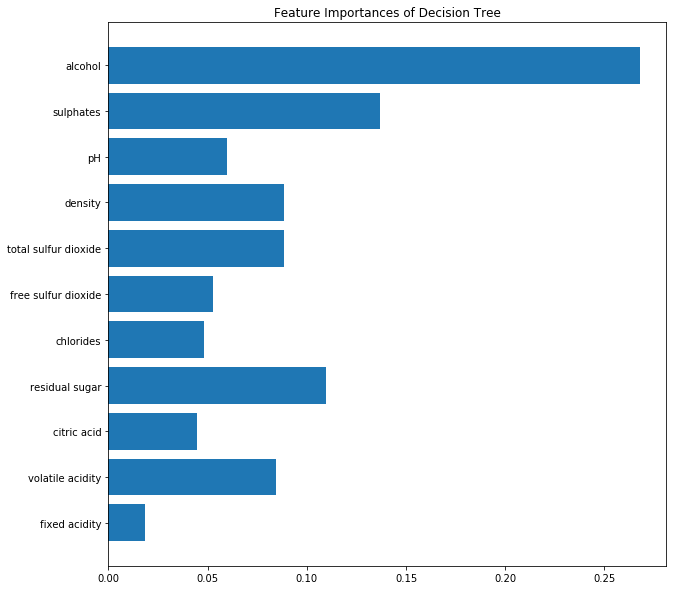

In [367]:
importnce = clft.feature_importances_
plt.figure(figsize=(10,10))
plt.title("Feature Importances of Decision Tree")
print(train_data_red.columns)
plt.barh(list(train_data_red.columns)[:-1], importnce, align="center")


In [368]:
clfl = LogisticRegression(random_state=0, max_iter = 10000).fit(train_x_red, train_y_red)
print(clfl.score(unknown_x_red, true_qualites_red))


0.6166666666666667


Naked logistic regression classifier has decent 60% score